In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import SquareData
import numpy as np

In [2]:
plt.style.use('seaborn-v0_8')
plt.style.use('fivethirtyeight')

In [3]:
training_files = 55
test_files = 10

In [4]:
dfs = []
for i in range(test_files):
    df_file = pd.read_csv(f'./test_results/{training_files+i}.csv')
    dfs.append(df_file)
df = pd.concat(dfs)

In [5]:
df

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,h4_actual,h4_pred,h5_actual,h5_pred,h6_actual,h6_pred,h7_actual,h7_pred,h8_actual,h8_pred
0,10,10,10,10,10,10,11,11,10,10,...,4,4,10,10,12,12,1,1,10,10
1,4,4,11,11,10,10,10,10,10,10,...,10,10,9,9,10,10,12,12,5,5
2,4,4,10,10,10,10,2,2,10,10,...,10,10,12,12,10,10,10,10,5,5
3,10,10,11,11,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,10,10,4,2,10,10,11,11,10,10,...,10,10,10,10,10,10,12,12,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,10,11,11,10,10,10,10,10,10,...,3,3,10,10,10,10,12,12,10,10
99996,4,4,11,11,10,10,10,10,10,10,...,10,10,10,10,10,10,12,12,5,5
99997,4,4,11,11,10,10,10,10,12,12,...,10,10,10,10,10,10,12,12,5,5
99998,10,10,10,10,11,11,10,10,10,10,...,10,10,9,9,12,12,10,10,10,10


In [6]:
actual_features = [ square + '_actual' for square in SquareData.squares ]

In [7]:
accuracy_features = [ square + '_correct' for square in SquareData.squares ]

In [8]:
accuracy_dict = {}
for square in SquareData.squares:
    accuracy_dict[square + '_correct'] = (df[square + '_actual'] == df[square + '_pred']).astype(int)
df = pd.concat([df,pd.DataFrame(accuracy_dict)],axis=1)

In [9]:
df.describe()

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,g7_correct,g8_correct,h1_correct,h2_correct,h3_correct,h4_correct,h5_correct,h6_correct,h7_correct,h8_correct
count,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,7.61062,7.610919,10.409025,10.414266,10.009537,10.018488,9.968997,9.981754,9.989919,9.999764,...,0.945193,0.990656,0.991861,0.986548,0.987977,0.966758,0.984872,0.987244,0.986715,0.991704
std,2.95862,2.957769,1.144916,1.129375,0.993734,0.976818,1.106330,1.084340,1.273904,1.271841,...,0.227603,0.096212,0.089849,0.115200,0.108988,0.179268,0.122062,0.112220,0.114492,0.090704
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,10.00000,10.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.00000,10.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.00000,10.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,g7_correct,g8_correct,h1_correct,h2_correct,h3_correct,h4_correct,h5_correct,h6_correct,h7_correct,h8_correct
0,10,10,10,10,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,1,1
1,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,1
2,4,4,10,10,10,10,2,2,10,10,...,1,1,1,1,1,1,1,1,1,1
3,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,1
4,10,10,4,2,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,1
99996,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,1
99997,4,4,11,11,10,10,10,10,12,12,...,1,1,1,1,1,1,1,1,1,1
99998,10,10,10,10,11,11,10,10,10,10,...,1,1,1,1,1,1,1,1,1,1


In [14]:
df['total_pieces'] = (df[actual_features] != 10).astype(int).sum(axis=1)

In [15]:
df

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,g8_correct,h1_correct,h2_correct,h3_correct,h4_correct,h5_correct,h6_correct,h7_correct,h8_correct,total_pieces
0,10,10,10,10,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,1,18
1,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,30
2,4,4,10,10,10,10,2,2,10,10,...,1,1,1,1,1,1,1,1,1,28
3,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,13
4,10,10,4,2,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,19
99996,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,1,32
99997,4,4,11,11,10,10,10,10,12,12,...,1,1,1,1,1,1,1,1,1,22
99998,10,10,10,10,11,11,10,10,10,10,...,1,1,1,1,1,1,1,1,1,29


In [16]:
df['total_incorrect'] = 64 - df[accuracy_features].sum(axis=1)

In [17]:
df

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,h1_correct,h2_correct,h3_correct,h4_correct,h5_correct,h6_correct,h7_correct,h8_correct,total_pieces,total_incorrect
0,10,10,10,10,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,18,4
1,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,30,0
2,4,4,10,10,10,10,2,2,10,10,...,1,1,1,1,1,1,1,1,28,2
3,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,13,1
4,10,10,4,2,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,19,2
99996,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,32,1
99997,4,4,11,11,10,10,10,10,12,12,...,1,1,1,1,1,1,1,1,22,0
99998,10,10,10,10,11,11,10,10,10,10,...,1,1,1,1,1,1,1,1,29,0


In [18]:
incorrect_squares = df.groupby(by='total_incorrect').size()

In [19]:
incorrect_squares

total_incorrect
0     216861
1     248745
2     239297
3     162356
4      82787
5      33596
6      11665
7       3470
8        941
9        221
10        52
11         8
12         1
dtype: int64

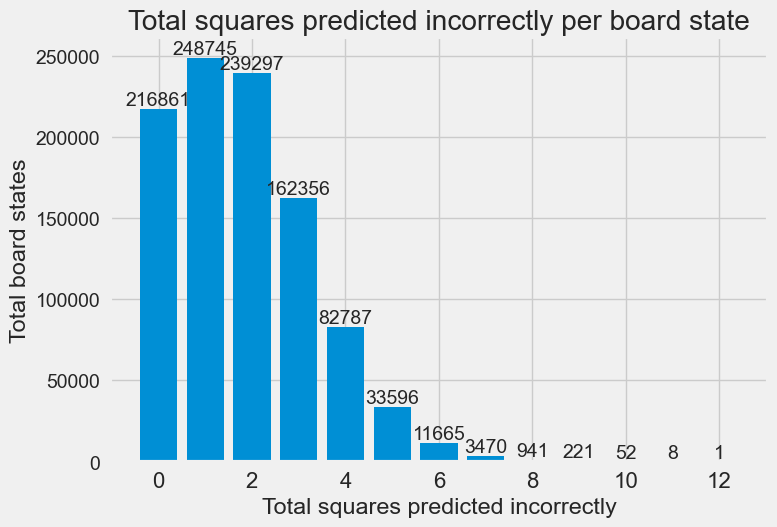

In [20]:
fig,ax=plt.subplots()
plt.bar(incorrect_squares.index,incorrect_squares)
plt.ylabel('Total board states')
plt.xlabel('Total squares predicted incorrectly')
plt.title('Total squares predicted incorrectly per board state')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
plt.xticks(size=16)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/incorrect_squares_test.pdf')

In [21]:
df[df['total_pieces']<16]

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,h1_correct,h2_correct,h3_correct,h4_correct,h5_correct,h6_correct,h7_correct,h8_correct,total_pieces,total_incorrect
3,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,13,1
7,10,10,11,11,10,10,12,12,10,10,...,1,1,1,1,1,0,1,1,15,5
9,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,13,1
11,10,10,10,10,11,11,10,10,12,12,...,1,1,1,1,1,1,1,1,14,4
14,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966,10,10,10,10,10,10,10,10,12,12,...,1,1,1,1,1,1,1,1,9,3
99972,10,10,10,10,8,8,10,10,10,10,...,1,1,1,1,1,1,1,1,15,0
99979,10,10,10,10,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,3,1
99982,10,10,10,10,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,15,5


In [22]:
df['total_pieces']<16

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: total_pieces, Length: 1000000, dtype: bool

In [23]:
(df['total_pieces']>24).sum()

385375

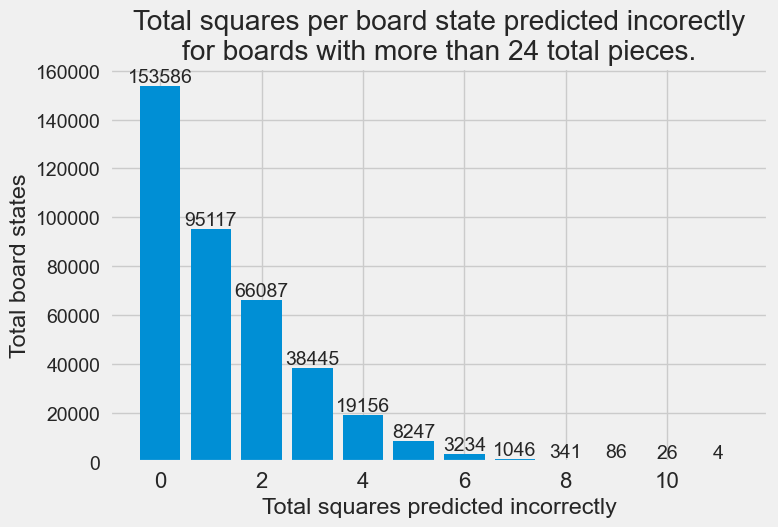

In [24]:
incorrect_squares_sub = df[df['total_pieces']>24].groupby(by='total_incorrect').size()
fig,ax=plt.subplots()
plt.bar(incorrect_squares_sub.index,incorrect_squares_sub)
plt.title('Total squares per board state predicted incorectly\nfor boards with more than 24 total pieces.')
plt.ylabel('Total board states')
plt.xlabel('Total squares predicted incorrectly')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
plt.xticks(size=16)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/incorrect_squares_test_24.pdf')

In [25]:
(df['total_pieces']<=8).sum()

61723

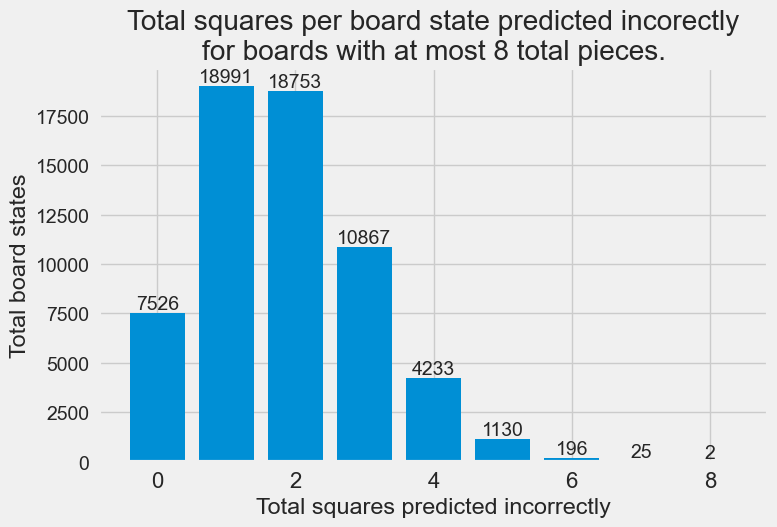

In [26]:
incorrect_squares_sub = df[df['total_pieces']<=8].groupby(by='total_incorrect').size()
fig,ax=plt.subplots()
plt.bar(incorrect_squares_sub.index,incorrect_squares_sub)
plt.title('Total squares per board state predicted incorectly\nfor boards with at most 8 total pieces.')
plt.ylabel('Total board states')
plt.xlabel('Total squares predicted incorrectly')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
plt.xticks(size=16)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/incorrect_squares_test_8.pdf')

In [27]:
stacked_dfs = []
for square in SquareData.squares:
    stacked_df_square = df[[square + '_actual',square + '_correct']]
    stacked_dfs.append(stacked_df_square.values)
stacked_df = pd.DataFrame(np.vstack(stacked_dfs))
stacked_df.columns = ['actual','correct']

In [28]:
stacked_df

,actual,correct
0,10,1
1,4,1
2,4,1
3,10,1
4,10,1
...,...,...
63999995,10,1
63999996,5,1
63999997,5,1
63999998,10,1


In [29]:
piece_accuracy_overall = stacked_df.groupby(by='actual').mean()
piece_accuracy_overall

,correct
actual,
0,0.921336
1,0.918778
2,0.745455
3,0.741393
4,0.922503
5,0.931023
6,0.833605
7,0.817844
8,0.808545


In [30]:
piece_accuracy_overall.index = SquareData.occupants_pretty
piece_accuracy_overall

,correct
white king,0.921336
black king,0.918778
white queen,0.745455
black queen,0.741393
white rook,0.922503
black rook,0.931023
white knight,0.833605
black knight,0.817844
white bishop,0.808545
black bishop,0.805556


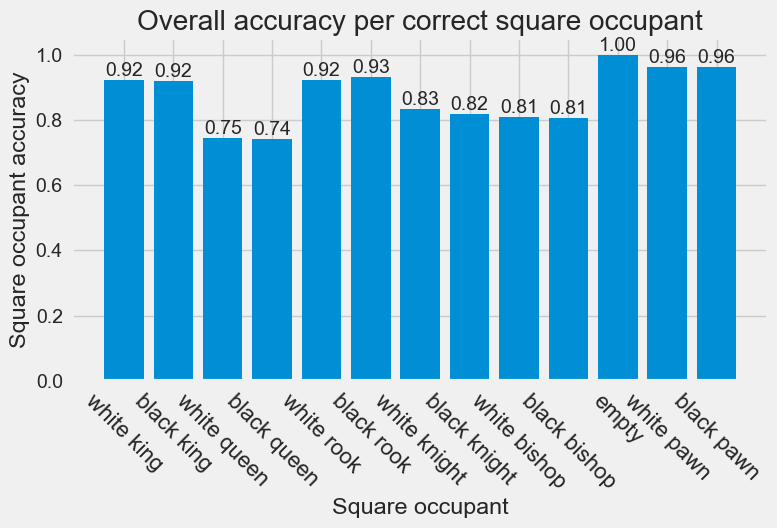

In [31]:
fig,ax = plt.subplots()
plt.bar(piece_accuracy_overall.index,piece_accuracy_overall['correct'])
plt.title('Overall accuracy per correct square occupant')
plt.ylabel('Square occupant accuracy')
plt.xlabel('Square occupant')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
plt.xticks(rotation=-45,size=16)
plt.yticks(size=14)
plt.tight_layout()
plt.savefig('./figs/overallpieceaccuracy.pdf')

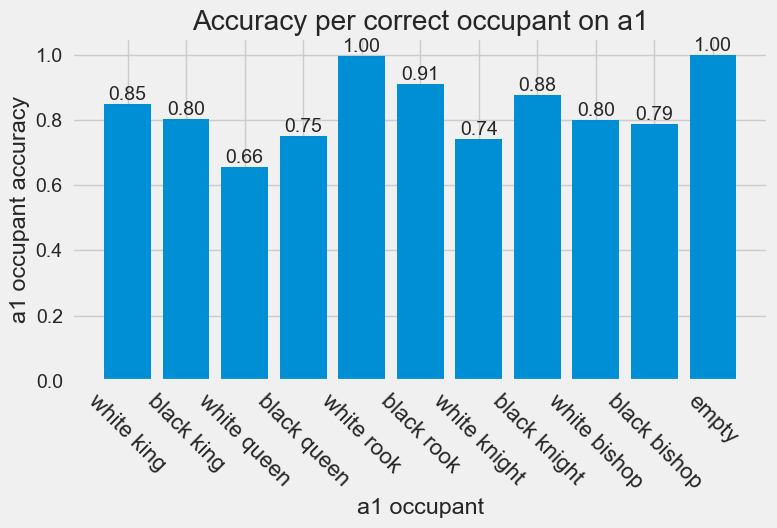

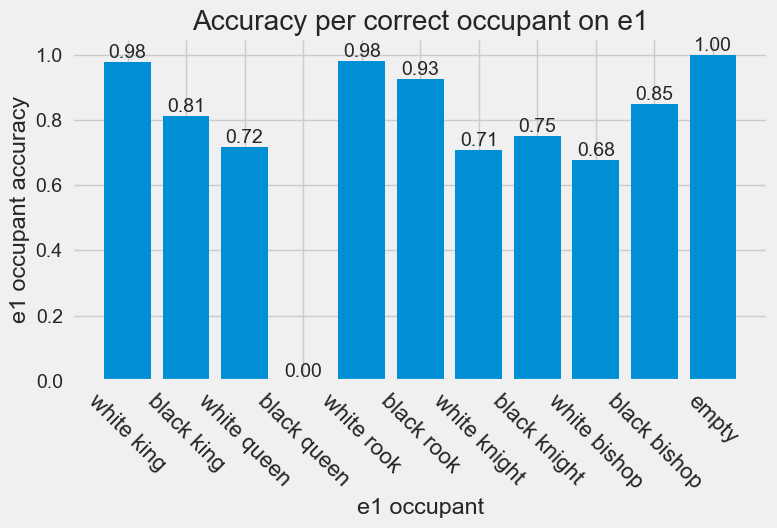

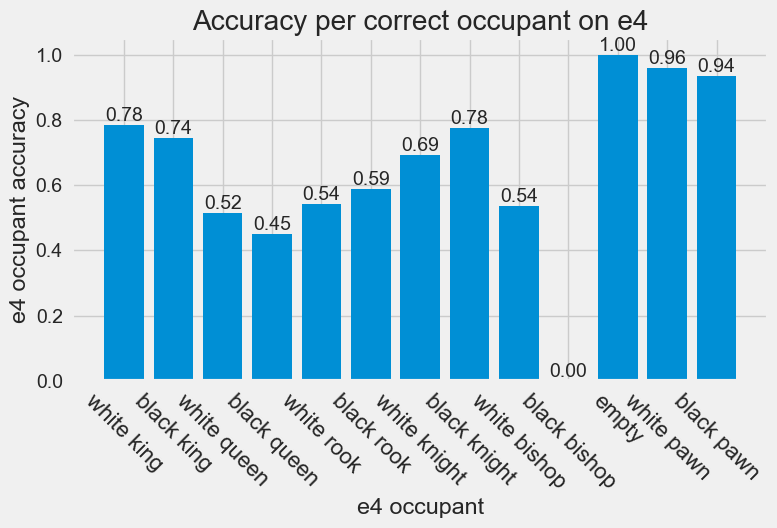

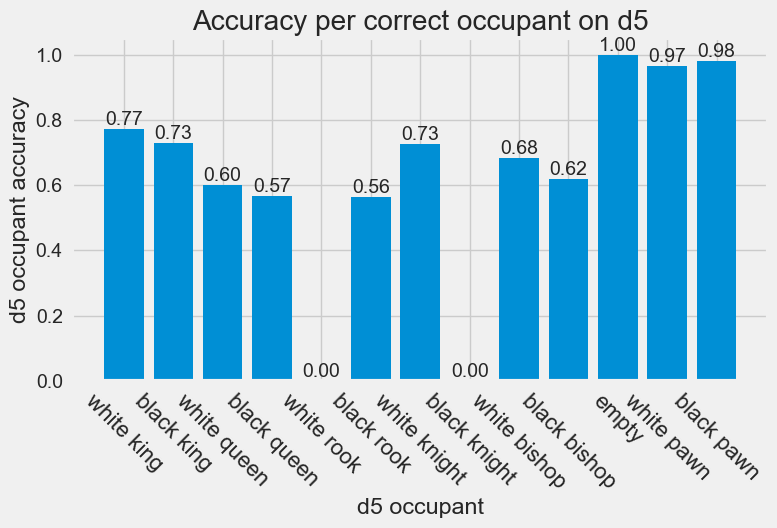

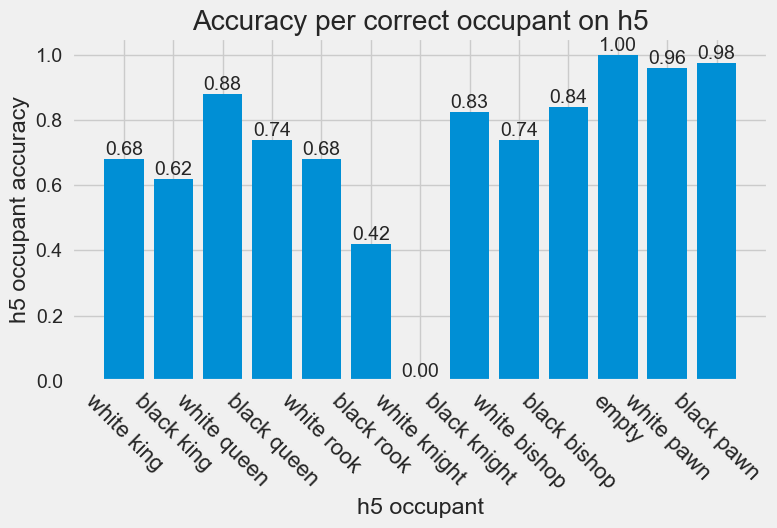

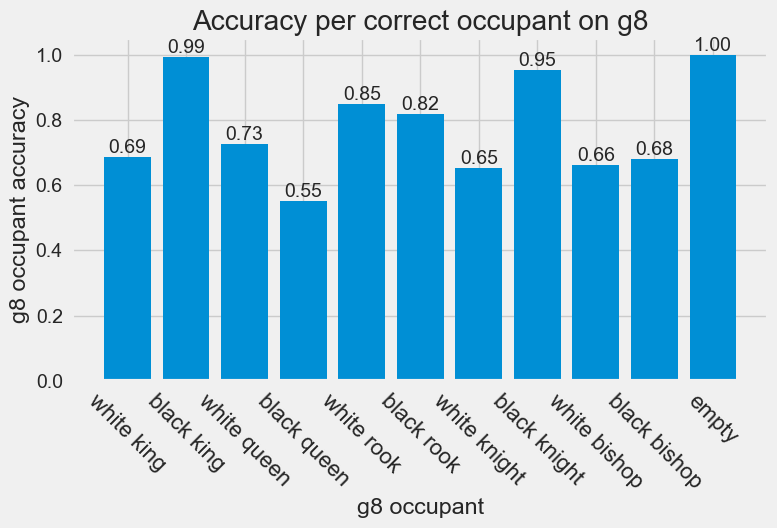

In [32]:
squares_to_plot = ['a1','e1','e4','d5', 'h5', 'g8']
for square in squares_to_plot:
    grouped_df = df[[square + '_actual',square + '_correct']].groupby(by=square + '_actual').mean()
    if square[1] == '1' or square[1] == '8':
        grouped_df.index = SquareData.first_last_rank_occupants_pretty
    else:
        grouped_df.index = SquareData.occupants_pretty
    fig,ax = plt.subplots()
    plt.bar(grouped_df.index,grouped_df[square + '_correct'])
    plt.title('Accuracy per correct occupant on ' + square)
    plt.ylabel(square + ' occupant accuracy')
    plt.xlabel(square + ' occupant')
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')
    plt.xticks(rotation=-45,size=16)
    plt.yticks(size=14)
    plt.tight_layout()
    plt.savefig(f'./figs/{square}pieceaccuracy.pdf')

In [33]:
df[[square + '_actual']].groupby(by=square + '_actual').size()

g8_actual
0        389
1     394995
2       1155
3        720
4       1538
5      19121
6        138
7      43166
8        466
9        835
10    537477
dtype: int64

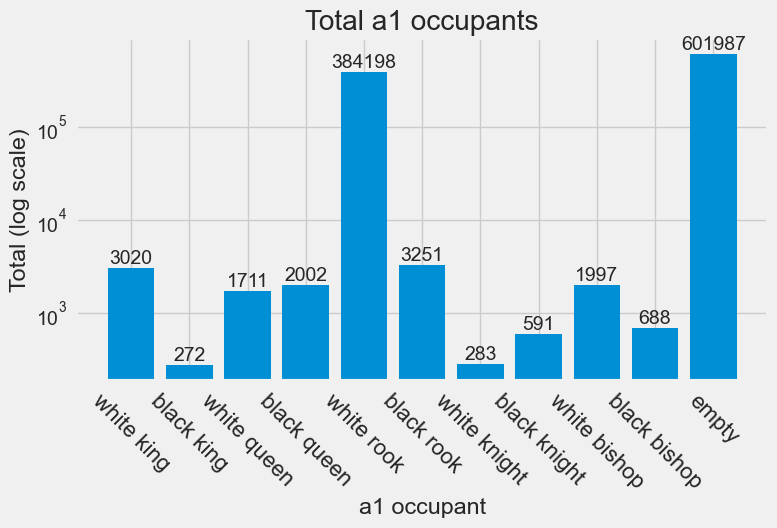

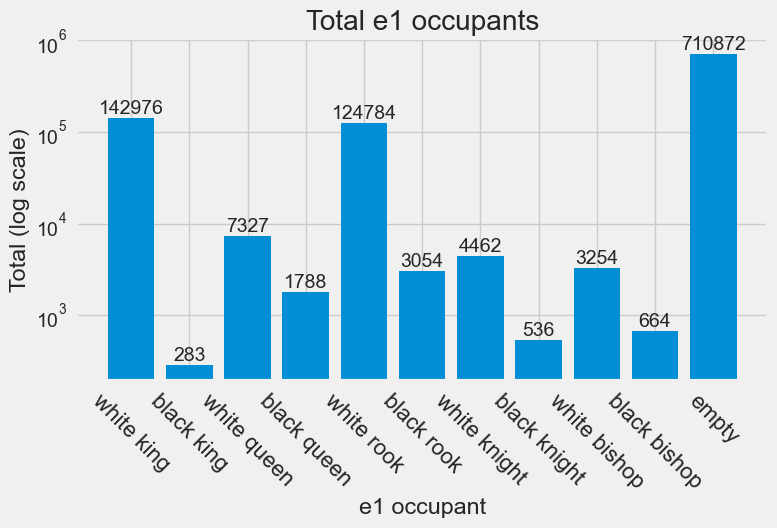

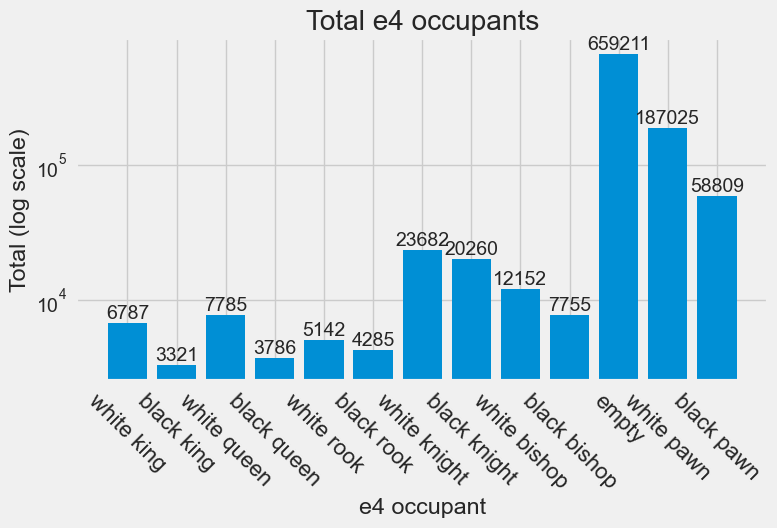

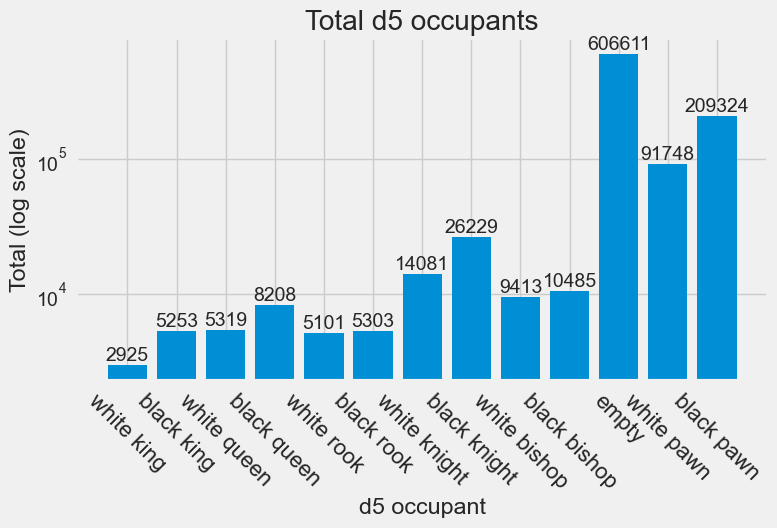

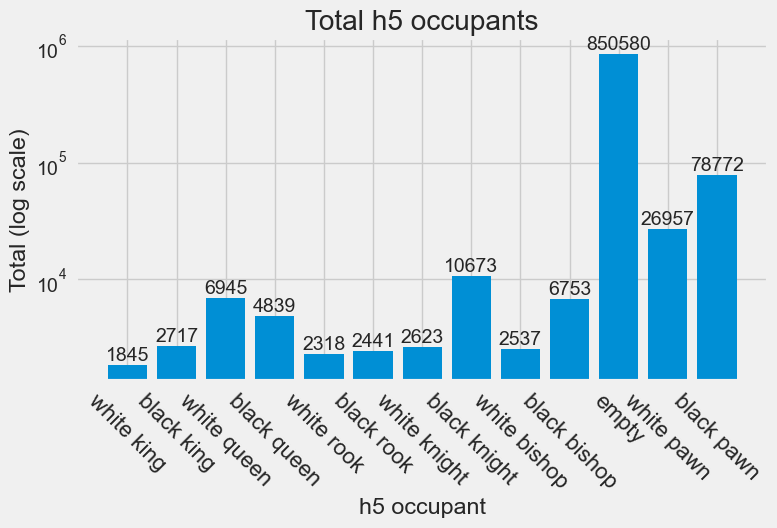

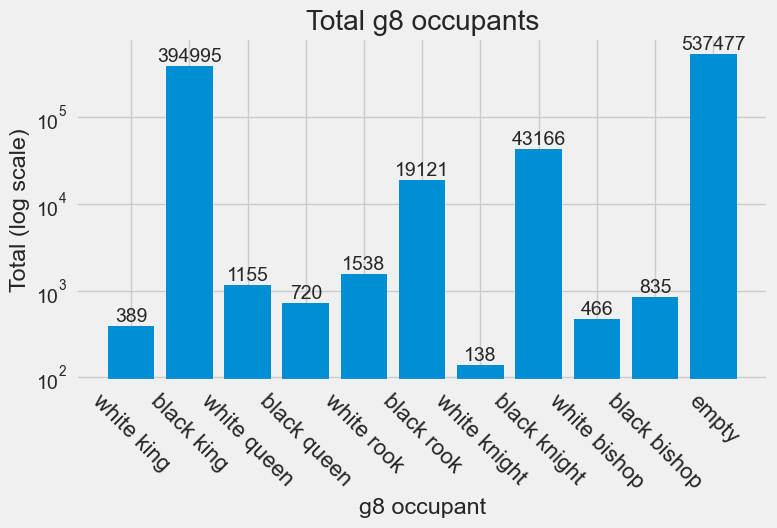

In [34]:
squares_to_plot = ['a1','e1','e4','d5', 'h5', 'g8']
for square in squares_to_plot:
    grouped_df = df[[square + '_actual']].groupby(by=square + '_actual').size()
    if square[1] == '1' or square[1] == '8':
        grouped_df.index = SquareData.first_last_rank_occupants_pretty
    else:
        grouped_df.index = SquareData.occupants_pretty
    fig,ax = plt.subplots()
    plt.bar(grouped_df.index,grouped_df)
    plt.title(f'Total {square} occupants')
    plt.ylabel('Total (log scale)')
    plt.xlabel(square + ' occupant')
    plt.xticks(rotation=-45,size=16)
    plt.yticks(size=14)
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f')
    plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f'./figs/{square}piecetotals.pdf')

In [35]:
df[['d5_actual','d5_correct']].groupby(by='d5_actual').mean()

,d5_correct
d5_actual,
0,0.772308
1,0.727965
2,0.599925
3,0.565668
4,0.000000
5,0.563455
6,0.726795
7,0.000000
8,0.683841


In [36]:
df['d5_actual'].value_counts()

10    606611
12    209324
11     91748
7      26229
6      14081
9      10485
8       9413
3       8208
2       5319
5       5303
1       5253
4       5101
0       2925
Name: d5_actual, dtype: int64

In [37]:
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000000 entries, 0 to 63999999
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   actual   int64
 1   correct  int64
dtypes: int64(2)
memory usage: 976.6 MB


In [11]:
stacked_dfs2 = []
for square in SquareData.squares:
    stacked_df_square = df[[square + '_actual',square + '_pred']]
    stacked_dfs2.append(stacked_df_square.values)
stacked_df2 = pd.DataFrame(np.vstack(stacked_dfs2))
stacked_df2.columns = ['actual','pred']

In [12]:
stacked_df2

,actual,pred
0,10,10
1,4,4
2,4,4
3,10,10
4,10,10
...,...,...
63999995,10,10
63999996,5,5
63999997,5,5
63999998,10,10


In [40]:
stacked_df2_white = stacked_df2[stacked_df2['actual'].isin([0,2,4,6,8,11])]
stacked_df2_black = stacked_df2[stacked_df2['actual'].isin([1,3,5,7,9,12])]
stacked_df2_x = stacked_df2[stacked_df2['actual'].isin([10])]

In [41]:
ww_accuracy = stacked_df2_white['pred'].isin([0,2,4,6,8,11]).sum()/len(stacked_df2_white)
bw_accuracy = stacked_df2_white['pred'].isin([1,3,5,7,9,12]).sum()/len(stacked_df2_white)
xw_accuracy = stacked_df2_white['pred'].isin([10]).sum()/len(stacked_df2_white)

wb_accuracy = stacked_df2_black['pred'].isin([0,2,4,6,8,11]).sum()/len(stacked_df2_black)
bb_accuracy = stacked_df2_black['pred'].isin([1,3,5,7,9,12]).sum()/len(stacked_df2_black)
xb_accuracy = stacked_df2_black['pred'].isin([10]).sum()/len(stacked_df2_black)

wx_accuracy = stacked_df2_x['pred'].isin([0,2,4,6,8,11]).sum()/len(stacked_df2_x)
bx_accuracy = stacked_df2_x['pred'].isin([1,3,5,7,9,12]).sum()/len(stacked_df2_x)
xx_accuracy = stacked_df2_x['pred'].isin([10]).sum()/len(stacked_df2_x)

In [42]:
print([ww_accuracy,bw_accuracy,xw_accuracy])
print([wb_accuracy,bb_accuracy,xb_accuracy])
print([wx_accuracy,bx_accuracy,xx_accuracy])

[0.9993513074399024, 0.00043097351664415543, 0.00021771904345347238]
[0.0004567967193982899, 0.9992781039611749, 0.00026509931942687403]
[3.332217622985162e-06, 2.5166398830936887e-06, 0.9999941511424939]


In [43]:
bw_accuracy

0.00043097351664415543

In [44]:
xw_accuracy

0.00021771904345347238

In [45]:
df

,a1_actual,a1_pred,a2_actual,a2_pred,a3_actual,a3_pred,a4_actual,a4_pred,a5_actual,a5_pred,...,h1_correct,h2_correct,h3_correct,h4_correct,h5_correct,h6_correct,h7_correct,h8_correct,total_pieces,total_incorrect
0,10,10,10,10,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,18,4
1,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,30,0
2,4,4,10,10,10,10,2,2,10,10,...,1,1,1,1,1,1,1,1,28,2
3,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,13,1
4,10,10,4,2,10,10,11,11,10,10,...,1,1,1,1,1,1,1,1,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,10,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,19,2
99996,4,4,11,11,10,10,10,10,10,10,...,1,1,1,1,1,1,1,1,32,1
99997,4,4,11,11,10,10,10,10,12,12,...,1,1,1,1,1,1,1,1,22,0
99998,10,10,10,10,11,11,10,10,10,10,...,1,1,1,1,1,1,1,1,29,0


In [50]:
total_piece_acc_mean = df[['total_pieces','total_incorrect']].groupby(by='total_pieces').mean()
total_piece_acc_std = df[['total_pieces','total_incorrect']].groupby(by='total_pieces').std()

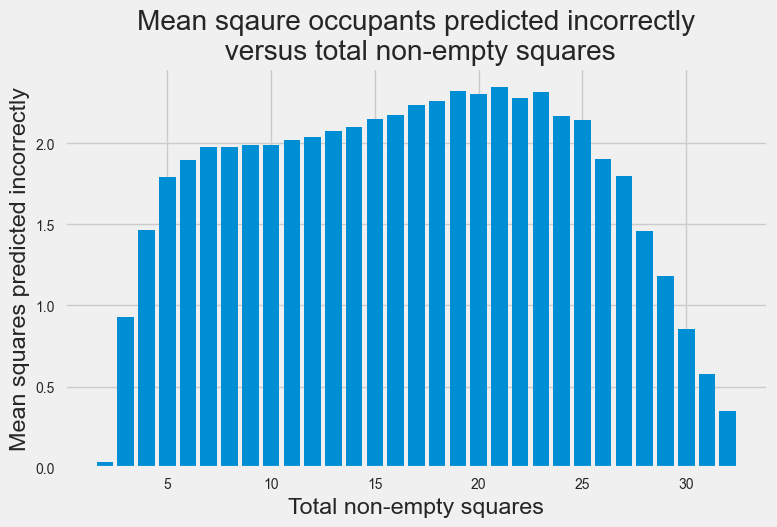

In [54]:
plt.bar(total_piece_acc_mean.index,total_piece_acc_mean['total_incorrect'])
#plt.errorbar(total_piece_acc_mean.index,total_piece_acc_mean['total_incorrect'],yerr=total_piece_acc_std['total_incorrect'],color='r',fmt='o')
plt.title('Mean sqaure occupants predicted incorrectly\n versus total non-empty squares')
plt.xlabel('Total non-empty squares')
plt.ylabel('Mean squares predicted incorrectly')
plt.tight_layout()
plt.savefig('./figs/incorrectvsnonempty.pdf')

In [48]:
df[['total_pieces','total_incorrect']].groupby(by='total_pieces').std()

,total_incorrect
total_pieces,
2,0.190626
3,0.535310
4,0.877218
5,1.084706
6,1.206614
7,1.263171
8,1.290097
9,1.301233
10,1.315023


In [49]:
df[['total_pieces']].groupby(by='total_pieces').size()

total_pieces
2        54
3      2754
4      6372
5      9082
6     12244
7     14331
8     16886
9     19424
10    22375
11    23911
12    27349
13    29415
14    32571
15    33197
16    36672
17    35350
18    38902
19    37368
20    42099
21    38108
22    45649
23    38640
24    51872
25    37624
26    59631
27    34696
28    70700
29    28291
30    80273
31    15871
32    58289
dtype: int64

In [19]:
stacked_df2['correct'] = (stacked_df2['actual']==stacked_df2['pred']).astype(int)
stacked_df2['one'] = 1

In [20]:
overall_acc = stacked_df2.groupby(by='actual',as_index=False).sum()

In [22]:
overall_acc['accuracy'] = overall_acc['correct']/overall_acc['one']

In [23]:
overall_acc

,actual,pred,correct,one,accuracy
0,0,654488,921336,1000000,0.921336
1,1,1680697,918778,1000000,0.918778
2,2,2155696,470036,630536,0.745455
3,3,2780968,464731,626835,0.741393
4,4,6107611,1351333,1464855,0.922503
5,5,7534436,1362313,1463243,0.931023
6,6,5677779,750148,899884,0.833605
7,7,6644950,732720,895917,0.817844
8,8,8108630,834461,1032053,0.808545
9,9,9280355,845129,1049125,0.805556


In [25]:
sum(overall_acc['accuracy'])/13

0.8747942614675158

In [26]:
sum(overall_acc['correct'])/sum(overall_acc['one'])

0.9715945